# Multiprocessing using Pools 
A simple framework for assessing the impact of multiprocessing on runtime on a multi-core machine. 

In [1]:
import timeit
import matplotlib.pyplot as plt
import random
import numpy as np
from time import perf_counter
from scipy.optimize import curve_fit
import time
import math
import multiprocessing
from multiprocessing import Pool

In [2]:
# A function for timing a job that uses a pool of processes.
#  f is a function that takes a single argument
#  data is an array of arguments on which f will be mapped
#  pool_size is the number of processes in the pool. 

def pool_process(f, data, pool_size):
    tp1 = time.time()
    pool = Pool(processes=pool_size) # initialize the Pool.
    result = pool.map(f, data)       # map f to the data using the Pool of processes to do the work 
    pool.close() # No more processes
    pool.join()  # Wait for the pool processing to complete.
    timetaken = (time.time()-tp1)
#     print("Results", result)
#     print("Overall Time:", int(time.time()-tp1))
    return timetaken

# 1. Testing

## Load Target function separately 
- We must load the target function separately, the check_prime function will be loaded in from miscFunc.py

In [3]:
import miscFunc as miscFunc # if miscFunc.py is changed the kernel needs to be restarted. 

In [4]:
# This testing was carried out on a Windows 10 OS with an Intel Core i7-9700k CPU
nprocs = multiprocessing.cpu_count()
print("The number of CPU Cores on this machine : ", nprocs)

The number of CPU Cores on this machine :  8


## Test 1

- The pool_process function was adjusted to return the time taken and print statements were commented out.
- We will generate large sets of work to be processed by the pool.
- We will loop over the list of check_work and record the time taken to process each item in the list. We will increase the length of the prime numbers to be processed each iteration and repeat this for 1 Core, 2 Cores, 4 Cores, 6 Cores and 8 Cores.
- The time taken to process the check_work for each core will be plotted on a graph and displayed.
- The charts created in the associated pdf document were based on the larger (9 digit) check_work. This was in order to see more evident results. However, this takes a large amount of time to replicate. To aid with testing, a smaller (8 digit) check_work is provided below which runs quicker and provides similar results.

In [5]:
# Smaller check_work for testing/correction purposes.
check_work = [12586753, 12586753, 12586753, 12586753, 12586753, 12586753, 12586753, 12586753]

In [6]:
# Larger check_work for more evident results. CAUTION! Runs much slower!
# check_work = [817504253, 817504301, 817504333, 817504339, 817504343, 817504349, 817504351, 817504361]

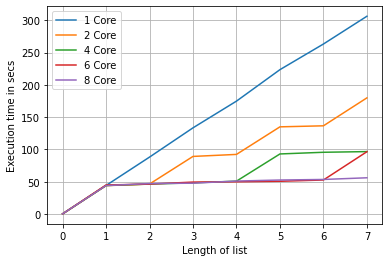

In [7]:
# Looping over the check_work and appending the time taken to each list. Increasing the length of check_work on each loop.
# Plotting the times taken for 1 Core, 2 Cores, 4 Cores, 6 Cores and 8 Cores to visualise the speedup acheived with multiple cores.

c1TimeList = []
c1PrimeLen = []

c2TimeList = []
c2PrimeLen = []

c4TimeList = []
c4PrimeLen = []

c6TimeList = []
c6PrimeLen = []

c8TimeList = []
c8PrimeLen = []

for y in range(len(check_work)):
    c1Time = pool_process(miscFunc.check_prime, check_work[:y], 1)
    c1TimeList.append(c1Time)
    c1PrimeLen.append(y)
    
    c2Time = pool_process(miscFunc.check_prime, check_work[:y], 2)
    c2TimeList.append(c2Time)
    c2PrimeLen.append(y)
    
    c4Time = pool_process(miscFunc.check_prime, check_work[:y], 4)
    c4TimeList.append(c4Time)
    c4PrimeLen.append(y)
    
    c6Time = pool_process(miscFunc.check_prime, check_work[:y], 6)
    c6TimeList.append(c6Time)
    c6PrimeLen.append(y)
    
    c8Time = pool_process(miscFunc.check_prime, check_work[:y], 8)
    c8TimeList.append(c8Time)
    c8PrimeLen.append(y)

plt.xlabel('Length of list') 
plt.ylabel('Execution time in secs') 
plt.plot(c1PrimeLen, c1TimeList, label = "1 Core")
plt.plot(c2PrimeLen, c2TimeList, label = "2 Core")
plt.plot(c4PrimeLen, c4TimeList, label = "4 Core")
plt.plot(c6PrimeLen, c6TimeList, label = "6 Core")
plt.plot(c8PrimeLen, c8TimeList, label = "8 Core")

plt.grid()
plt.legend()
plt.savefig("MultiprocessingGraph")
plt.show()

In [8]:
# Printing the times taken and the associated length of list for each core.
print("1 Core\nTime: ", c1TimeList, "\nLength of List :", c1PrimeLen)
print("\n2 Cores\nTime: ", c2TimeList, "\nLength of List :", c2PrimeLen)
print("\n4 Cores\nTime: ", c4TimeList, "\nLength of List :", c4PrimeLen)
print("\n6 Cores\nTime: ", c6TimeList, "\nLength of List :", c6PrimeLen)
print("\n8 Cores\nTime: ", c8TimeList, "\nLength of List :", c8PrimeLen)

1 Core
Time:  [0.1089012622833252, 44.13376593589783, 88.11390233039856, 133.4637906551361, 174.85788583755493, 223.63624715805054, 263.36535573005676, 306.4055030345917] 
Length of List : [0, 1, 2, 3, 4, 5, 6, 7]

2 Cores
Time:  [0.07878994941711426, 43.91679906845093, 46.37933373451233, 89.17154169082642, 92.29735946655273, 135.02117538452148, 136.6150186061859, 179.92285466194153] 
Length of List : [0, 1, 2, 3, 4, 5, 6, 7]

4 Cores
Time:  [0.0827791690826416, 44.091575622558594, 46.29633402824402, 48.22406268119812, 50.85218954086304, 93.00418734550476, 95.60405540466309, 96.65306901931763] 
Length of List : [0, 1, 2, 3, 4, 5, 6, 7]

6 Cores
Time:  [0.10172820091247559, 44.88088130950928, 46.29672646522522, 49.41405153274536, 49.88124942779541, 50.65430450439453, 52.63604402542114, 96.48963975906372] 
Length of List : [0, 1, 2, 3, 4, 5, 6, 7]

8 Cores
Time:  [0.1515953540802002, 43.986071825027466, 47.139668703079224, 47.68906354904175, 50.99787378311157, 52.598928451538086, 53.4673

## Test 2

- Plotting the overall time taken for each core to process the check_work on a bar chart.

In [9]:
# Appending the 7th index (total time taken) of each core to a the overallTimes list
overallTimes = []
overallTimes.append(c1TimeList[7])
overallTimes.append(c2TimeList[7])
overallTimes.append(c4TimeList[7])
overallTimes.append(c6TimeList[7])
overallTimes.append(c8TimeList[7])
print(overallTimes)

[306.4055030345917, 179.92285466194153, 96.65306901931763, 96.48963975906372, 56.073654651641846]


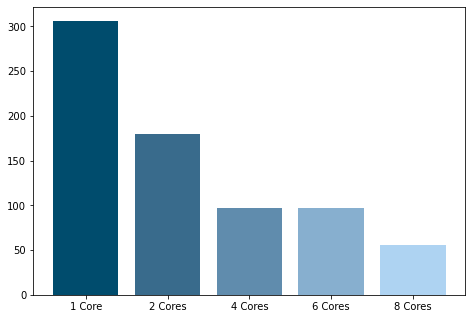

In [10]:
# Plotting the overallTimes for each core and displaying it on a barchart

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
cores = ['1 Core', '2 Cores', '4 Cores', '6 Cores', '8 Cores']
barColour = ["#004c6d","#396b8c","#608cad","#87afcf","#aed3f2"]
ax.bar(cores, overallTimes, color = barColour)

fig.savefig('MultiprocessingBarChart.png', bbox_inches='tight')
plt.show()

## 2. b) Repeating the exercise on VirtualBox (Ubuntu 20.04)

- The above exercises were reran on VirtualBox that was running Ubuntu 20.04
- The below results were obtained

## Test 1 (Ubuntu 20.04)

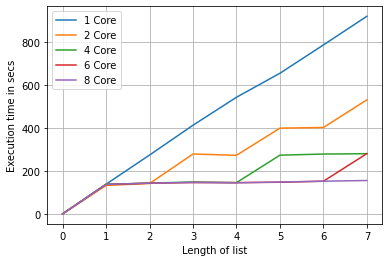

In [49]:
# Displaying the results achieved by re-running the above tests on a Virtual Box that was running Ubuntu 20.04
# Plotting the graph achieved by re-running the above tests.

c1TimeLinux = [0.010396242141723633, 137.8972954750061, 273.4125328063965, 412.02193665504456, 542.0180885791779, 653.6165280342102, 785.1085364818573, 918.4384634494781]
c1PrimeLinux = [0, 1, 2, 3, 4, 5, 6, 7]

c2TimeLinux = [0.0084075927734375, 132.34928631782532, 141.12228345870972, 278.2508511543274, 272.26989006996155, 398.56704330444336, 401.5691080093384, 530.1266469955444]
c2PrimeLinux = [0, 1, 2, 3, 4, 5, 6, 7]

c4TimeLinux = [0.01510000228881836, 137.77675700187683, 143.0320131778717, 148.33379435539246, 145.3524944782257, 273.0189485549927, 278.0983462333679, 279.74221658706665]
c4PrimeLinux = [0, 1, 2, 3, 4, 5, 6, 7]

c6TimeLinux = [0.022725343704223633, 136.80967354774475, 143.02863073349, 145.7389621734619, 145.46165561676025, 147.15073561668396, 151.97410440444946, 280.33015036582947]
c6PrimeLinux = [0, 1, 2, 3, 4, 5, 6, 7]

c8TimeLinux = [0.05306720733642578, 137.20479774475098, 142.9452497959137, 146.35439205169678, 144.5972306728363, 148.17155480384827, 152.0201473236084, 155.26735734939575]
c8PrimeLinux = [0, 1, 2, 3, 4, 5, 6, 7]


plt.xlabel('Length of list') 
plt.ylabel('Execution time in secs') 
plt.plot(c1PrimeLinux, c1TimeLinux, label = "1 Core")
plt.plot(c2PrimeLinux, c2TimeLinux, label = "2 Core")
plt.plot(c4PrimeLinux, c4TimeLinux, label = "4 Core")
plt.plot(c6PrimeLinux, c6TimeLinux, label = "6 Core")
plt.plot(c8PrimeLinux, c8TimeLinux, label = "8 Core")

plt.grid()
plt.legend()
plt.show()

## Test 2 (Ubuntu 20.04)

In [50]:
# Appending the 7th index (total time taken) of each core for the results of the tests on a Ubuntu VirtualBox
linuxOverallTimes = []
linuxOverallTimes.append(c1TimeLinux[7])
linuxOverallTimes.append(c2TimeLinux[7])
linuxOverallTimes.append(c4TimeLinux[7])
linuxOverallTimes.append(c6TimeLinux[7])
linuxOverallTimes.append(c8TimeLinux[7])
print(linuxOverallTimes)

[918.4384634494781, 530.1266469955444, 279.74221658706665, 280.33015036582947, 155.26735734939575]


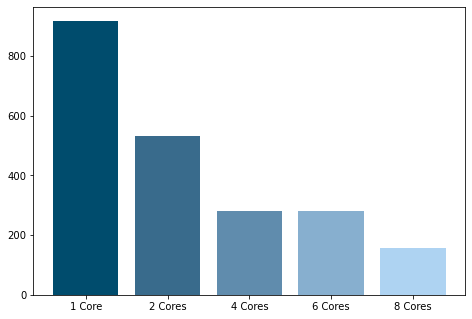

In [51]:
# Plotting the linuxOverallTimes for each core and displaying it on a barchart

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
cores = ['1 Core', '2 Cores', '4 Cores', '6 Cores', '8 Cores']
barColour = ["#004c6d","#396b8c","#608cad","#87afcf","#aed3f2"]
ax.bar(cores, linuxOverallTimes, color = barColour)

plt.show()

## Results

- Hard coding the results from a previous run of the longer check_work for Windows & Ubuntu incase the shorter check_work is used and these results are lost.

In [52]:
# Hard coding the full list of results for Windows that was generated using the longer check_work list

c1TimeWindows = [0.1089012622833252, 44.13376593589783, 88.11390233039856, 133.4637906551361, 174.85788583755493, 223.63624715805054, 263.36535573005676, 306.4055030345917]
c1PrimeWindows = [0, 1, 2, 3, 4, 5, 6, 7]

c2TimeWindows = [0.07878994941711426, 43.91679906845093, 46.37933373451233, 89.17154169082642, 92.29735946655273, 135.02117538452148, 136.6150186061859, 179.92285466194153]
c2PrimeWindows = [0, 1, 2, 3, 4, 5, 6, 7]

c4TimeWindows = [0.0827791690826416, 44.091575622558594, 46.29633402824402, 48.22406268119812, 50.85218954086304, 93.00418734550476, 95.60405540466309, 96.65306901931763]
c4PrimeWindows = [0, 1, 2, 3, 4, 5, 6, 7]

c6TimeWindows = [0.10172820091247559, 44.88088130950928, 46.29672646522522, 49.41405153274536, 49.88124942779541, 50.65430450439453, 52.63604402542114, 96.48963975906372]
c6PrimeWindows = [0, 1, 2, 3, 4, 5, 6, 7]

c8TimeWindows = [0.05306720733642578, 137.20479774475098, 142.9452497959137, 146.35439205169678, 144.5972306728363, 148.17155480384827, 152.0201473236084, 155.26735734939575]
c8PrimeWindows = [0, 1, 2, 3, 4, 5, 6, 7]

In [53]:
# Printing the full list of Windows Results that was generated using the longer check_work list

print("Windows Results: \n")
print("1 Core\nTime: ", c1TimeWindows, "\nLength of List :", c1PrimeWindows)
print("\n2 Cores\nTime: ", c2TimeWindows, "\nLength of List :", c2PrimeWindows)
print("\n4 Cores\nTime: ", c4TimeWindows, "\nLength of List :", c4PrimeWindows)
print("\n6 Cores\nTime: ", c6TimeWindows, "\nLength of List :", c6PrimeWindows)
print("\n8 Cores\nTime: ", c8TimeWindows, "\nLength of List :", c8PrimeWindows)

Windows Results: 

1 Core
Time:  [0.1089012622833252, 44.13376593589783, 88.11390233039856, 133.4637906551361, 174.85788583755493, 223.63624715805054, 263.36535573005676, 306.4055030345917] 
Length of List : [0, 1, 2, 3, 4, 5, 6, 7]

2 Cores
Time:  [0.07878994941711426, 43.91679906845093, 46.37933373451233, 89.17154169082642, 92.29735946655273, 135.02117538452148, 136.6150186061859, 179.92285466194153] 
Length of List : [0, 1, 2, 3, 4, 5, 6, 7]

4 Cores
Time:  [0.0827791690826416, 44.091575622558594, 46.29633402824402, 48.22406268119812, 50.85218954086304, 93.00418734550476, 95.60405540466309, 96.65306901931763] 
Length of List : [0, 1, 2, 3, 4, 5, 6, 7]

6 Cores
Time:  [0.10172820091247559, 44.88088130950928, 46.29672646522522, 49.41405153274536, 49.88124942779541, 50.65430450439453, 52.63604402542114, 96.48963975906372] 
Length of List : [0, 1, 2, 3, 4, 5, 6, 7]

8 Cores
Time:  [0.05306720733642578, 137.20479774475098, 142.9452497959137, 146.35439205169678, 144.5972306728363, 148.171

In [54]:
# Printing the full list of Ubuntu Results that was generated using the longer check_work list

print("Ubuntu Results: \n")
print("1 Core\nTime: ", c1TimeLinux, "\nLength of List :", c1PrimeLinux)
print("\n2 Cores\nTime: ", c2TimeLinux, "\nLength of List :", c2PrimeLinux)
print("\n4 Cores\nTime: ", c4TimeLinux, "\nLength of List :", c4PrimeLinux)
print("\n6 Cores\nTime: ", c6TimeLinux, "\nLength of List :", c6PrimeLinux)
print("\n8 Cores\nTime: ", c8TimeLinux, "\nLength of List :", c8PrimeLinux)

Ubuntu Results: 

1 Core
Time:  [0.010396242141723633, 137.8972954750061, 273.4125328063965, 412.02193665504456, 542.0180885791779, 653.6165280342102, 785.1085364818573, 918.4384634494781] 
Length of List : [0, 1, 2, 3, 4, 5, 6, 7]

2 Cores
Time:  [0.0084075927734375, 132.34928631782532, 141.12228345870972, 278.2508511543274, 272.26989006996155, 398.56704330444336, 401.5691080093384, 530.1266469955444] 
Length of List : [0, 1, 2, 3, 4, 5, 6, 7]

4 Cores
Time:  [0.01510000228881836, 137.77675700187683, 143.0320131778717, 148.33379435539246, 145.3524944782257, 273.0189485549927, 278.0983462333679, 279.74221658706665] 
Length of List : [0, 1, 2, 3, 4, 5, 6, 7]

6 Cores
Time:  [0.022725343704223633, 136.80967354774475, 143.02863073349, 145.7389621734619, 145.46165561676025, 147.15073561668396, 151.97410440444946, 280.33015036582947] 
Length of List : [0, 1, 2, 3, 4, 5, 6, 7]

8 Cores
Time:  [0.05306720733642578, 137.20479774475098, 142.9452497959137, 146.35439205169678, 144.5972306728363, 

## Comparison of Results

- Comparing the overall running times between cores for the Windows tests.
- We will calculate the % decrease between each of the cores.

In [55]:
# Comparison of execution time between 1 Core & 2 Cores.

core1Decrease = round((((306.4055030345917 - 179.92285466194153)/306.4055030345917)*100),2)
print("The execution time decreased by",core1Decrease,"% between 1 Core & 2 Cores")

The execution time decreased by 41.28 % between 1 Core & 2 Cores


In [56]:
# Comparison of execution time between 2 Cores & 4 Cores.

core2Decrease = round((((179.92285466194153 - 96.65306901931763)/179.92285466194153)*100),2)
print("The execution time decreased by",core2Decrease,"% between 2 Cores & 4 Cores")

The execution time decreased by 46.28 % between 2 Cores & 4 Cores


In [57]:
# Comparison of execution time between 4 Cores & 6 Cores.

core4Decrease = round((((96.65306901931763 - 96.48963975906372)/96.65306901931763)*100),2)
print("The execution time decreased by",core4Decrease,"% between 4 Cores & 6 Cores")

The execution time decreased by 0.17 % between 4 Cores & 6 Cores


In [58]:
# Comparison of execution time between 6 Cores & 8 Cores.

core6Decrease = round((((96.48963975906372 - 56.073654651641846)/96.48963975906372)*100),2)
print("The execution time decreased by",core6Decrease,"% between 6 Cores & 8 Cores")

The execution time decreased by 41.89 % between 6 Cores & 8 Cores


##### Ubuntu (VirtualBox) vs Windows Comparison
- Comparing the overall times on Ubuntu using the VirtualBox vs Windows.
- We will calculate the % increase between the two operating systems.

In [59]:
# Comparing speeds of 1 Core on Ubuntu (VirtualBox) vs Windows

core1Increase = round((((918.4384634494781 - 306.4055030345917)/306.4055030345917)*100),2)
print("Ubuntu took",core1Increase,"% longer to complete with 1 Core")

Ubuntu took 199.75 % longer to complete with 1 Core


In [60]:
# Comparing speeds of 2 Cores on Ubuntu (VirtualBox) vs Windows

core2Increase = round((((530.1266469955444 - 179.92285466194153)/179.92285466194153)*100),2)
print("Ubuntu took",core2Increase,"% longer to complete with 2 Cores")

Ubuntu took 194.64 % longer to complete with 2 Cores


In [61]:
# Comparing speeds of 4 Cores on Ubuntu (VirtualBox) vs Windows

core4Increase = round((((279.74221658706665 - 96.65306901931763)/96.65306901931763)*100),2)
print("Ubuntu took",core4Increase,"% longer to complete with 4 Cores")

Ubuntu took 189.43 % longer to complete with 4 Cores


In [62]:
# Comparing speeds of 6 Cores on Ubuntu (VirtualBox) vs Windows

core6Increase = round((((280.33015036582947 - 96.48963975906372)/96.48963975906372)*100),2)
print("Ubuntu took",core6Increase,"% longer to complete with 6 Cores")

Ubuntu took 190.53 % longer to complete with 6 Cores


In [63]:
# Comparing speeds of 8 Cores on Ubuntu (VirtualBox) vs Windows

core8Increase = round((((155.26735734939575 - 56.073654651641846)/56.073654651641846)*100),2)
print("Ubuntu took",core8Increase,"% longer to complete with 8 Cores")

Ubuntu took 176.9 % longer to complete with 8 Cores


In [64]:
# Calculating the average speed over all the cores

averageIncrease = round((core1Increase + core2Increase + core4Increase + core6Increase + core8Increase)/5,2)
print("On average, Ubuntu took", averageIncrease,"% longer to complete than Windows")

On average, Ubuntu took 190.25 % longer to complete than Windows
